# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

Questions 1-3 are on the png in the assignment folder called "EDA questions.png"

4.) Since a non-decreasing transformation preserves order, the median of 𝑋 remains the median value after transformation. Minimum, Q1 (25th percentile), Median (50th percentile), Q3 (75th percentile), and Maximum all transform in the same way. The IQR (difference between the 75th and 25th percentiles) may change under non-linear transformations. Additionally, if g(x) is nonlinear, the transformed max and min values may be unevenly scaled, changing the range.

5.) For linear functions, it is always trues that $m(g(X))= g(m(X))$. For nonlinear transformations, this does not hold true.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.


In [53]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
file_path = "./data/ForeignGifts_edu.csv"
df = pd.read_csv(file_path)
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.


In [34]:
df["Foreign Gift Amount"].describe()

count    2.819700e+04
mean     5.887770e+05
std      3.223327e+06
min      1.000000e+00
25%      5.793000e+03
50%      9.509100e+04
75%      3.767520e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

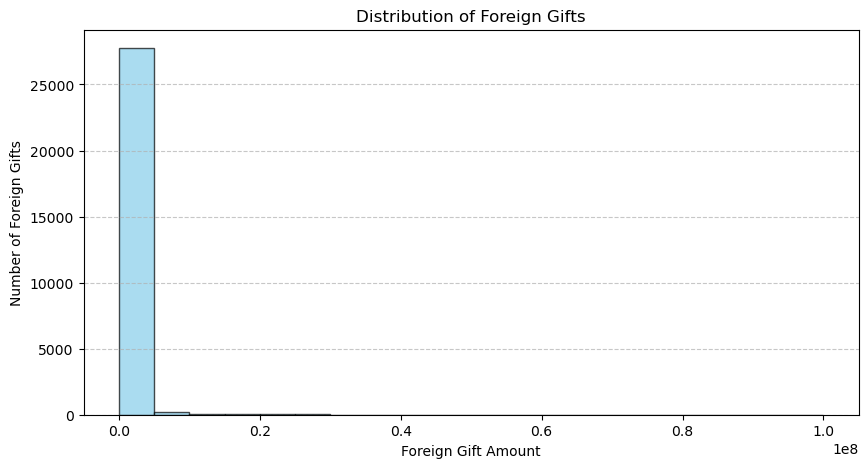

In [30]:
# Drop missing age values
df = df.dropna(subset=["Foreign Gift Amount"])
df = df[df["Foreign Gift Amount"] > 0]

plt.figure(figsize=(10,5))
plt.hist(df["Foreign Gift Amount"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Number of Foreign Gifts")
plt.title("Distribution of Foreign Gifts")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

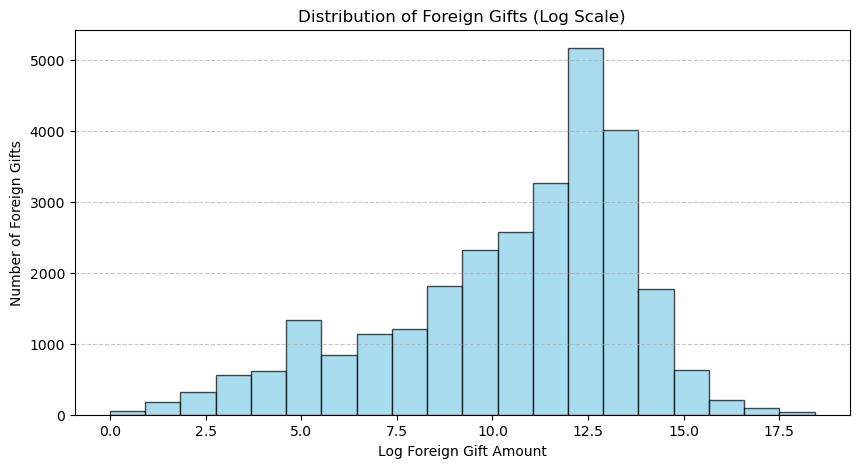

In [ ]:
# Log transformation
df["log_Foreign_Gift"] = np.log(df["Foreign Gift Amount"])

plt.figure(figsize=(10,5))
plt.hist(df["log_Foreign_Gift"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Log Foreign Gift Amount")
plt.ylabel("Number of Foreign Gifts")
plt.title("Distribution of Foreign Gifts (Log Scale)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- The nontransformed data shows a right-skewed trend, meaning there are many smaller foreign gifts and fewer large ones
- The log transformation gives a better look into the distribution since it compressed the large values and stretched the smaller ones


3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

       Gift Type  Proportion
0       Contract    0.611767
1  Monetary Gift    0.387843
2    Real Estate    0.000390


<Figure size 1000x500 with 0 Axes>

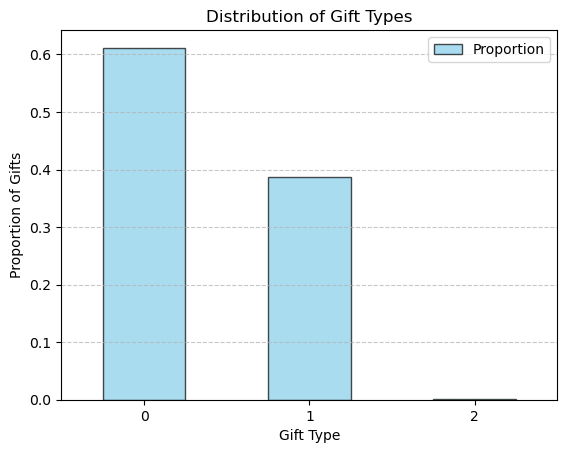

In [52]:
gift_type_counts = df["Gift Type"].value_counts(normalize=True).to_frame()

# Value counts table
gift_type_counts.columns = ["Proportion"]
gift_type_counts = gift_type_counts.reset_index()
gift_type_counts.columns = ["Gift Type", "Proportion"]
print(gift_type_counts)

# Plot histogram
plt.figure(figsize=(10, 5))
gift_type_counts.plot(kind="bar", color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Gift Type")
plt.ylabel("Proportion of Gifts")
plt.title("Distribution of Gift Types")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

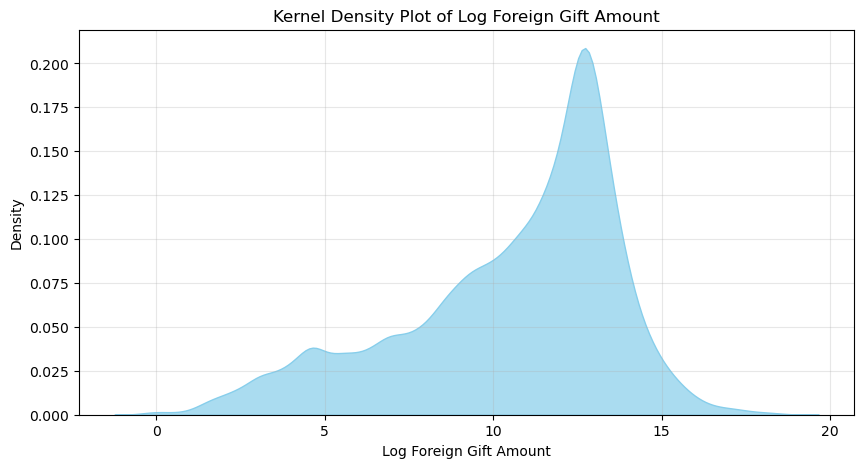

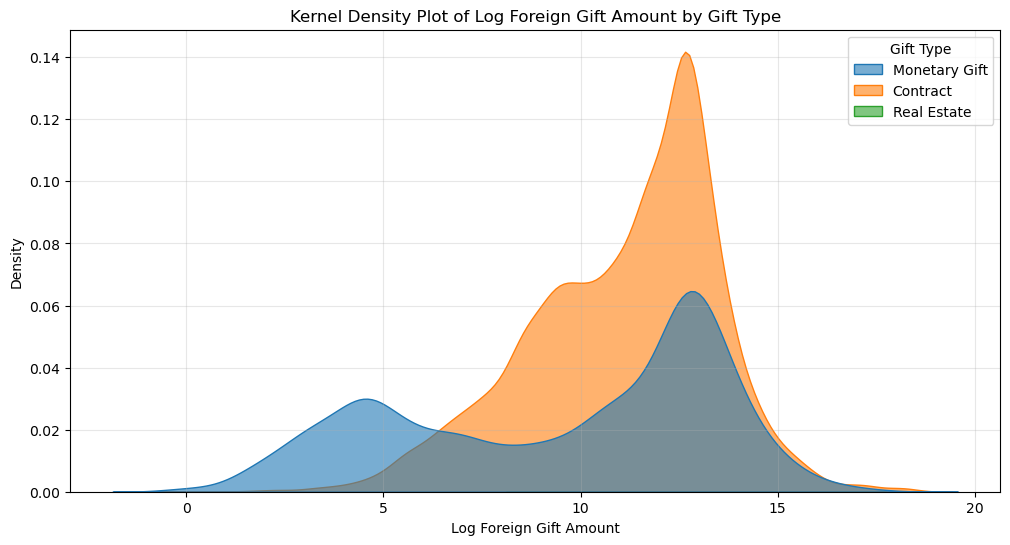

In [58]:
df["log_Foreign_Gift"] = np.log(df["Foreign Gift Amount"])

# Kernel density plot
plt.figure(figsize=(10,5))
sns.kdeplot(df["log_Foreign_Gift"], fill=True, color="skyblue", alpha=0.7)
plt.xlabel("Log Foreign Gift Amount")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Log Foreign Gift Amount")
plt.grid(alpha=0.3)
plt.show()

# Kernel density plot conditional on Gift Type
plt.figure(figsize=(12,6))
ax = sns.kdeplot(data=df, x="log_Foreign_Gift", hue="Gift Type", fill=True, alpha=0.6)
plt.xlabel("Log Foreign Gift Amount")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Log Foreign Gift Amount by Gift Type")
sns.move_legend(ax, "upper right", title="Gift Type")
plt.grid(alpha=0.3)
plt.show()

- The Contract category (orange) has the highest density peak around log 13-14, suggesting that contracts tend to involve large sums, often in the range of $500,000 to  $1.3 million
- Monetary Gift category (blue) has two distinct peaks, suggesting that monetary gifts come in two broad groups:  smaller donations (possibly individual contributions) and larger sums, which may be institutional funding or grants
- Real Estate category (green) appears less frequent compared to Contracts and Monetary Gifts

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [68]:
# Top 15 countries by number of gifts
top_countries_by_count = df["Country of Giftor"].value_counts().head(15)

# Top 15 countries by total amount given
top_countries_by_amount = df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15)

print(top_countries_by_amount)
print(top_countries_by_count)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464933703
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    656325544
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442484396
UNITED ARAB EMIRATES     431396357
FRANCE                   405925834
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64
Country of Giftor
ENGLAND            3654
CHINA              2461
CANADA             2344
JAPAN              1891
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1433
GERMANY            1393
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


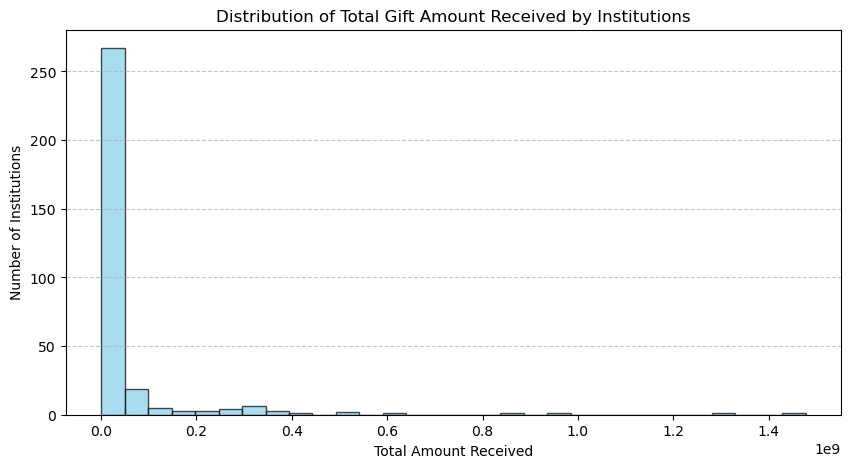

In [ ]:
top_institutions_by_amount = df.groupby("Institution Name")["Foreign Gift Amount"].sum().nlargest(15)
print(top_institutions_by_amount)

plt.figure(figsize=(10,5))
plt.hist(df.groupby("Institution Name")["Foreign Gift Amount"].sum(), bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Gift Amount Received by Institutions")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

7. Which giftors provide the most money, in total?

In [ ]:
top_giftors_by_amount = df.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(15).to_frame()
top_giftors_by_amount.columns = ["Total Gift Amount"]

top_giftors_by_amount

,Total Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [97]:
file_path = "./data/drilling_rigs.csv"
df = pd.read_csv(file_path)
#print(df.head(),'\n')
df.head(10)
#print(df.describe(),'\n')

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991
5,1973 June,1042,76,Not Available,Not Available,Not Available,Not Available,Not Available,1118,1994
6,1973 July,1075,81,Not Available,Not Available,Not Available,Not Available,Not Available,1156,1997
7,1973 August,1140,82,Not Available,Not Available,Not Available,Not Available,Not Available,1222,2112
8,1973 September,1183,83,Not Available,Not Available,Not Available,Not Available,Not Available,1266,2227
9,1973 October,1250,84,Not Available,Not Available,Not Available,Not Available,Not Available,1334,2247


In [ ]:
# Number of observations
print(df.shape)  # 623 observations

# Number of variables
print(df.columns) # 10 variables

#  Types of variables and number of missing values
df_dtypes = df.dtypes
missing_values = df.isnull().sum()
print(df_dtypes, missing_values)

# Converting columns that were not previously numeric to floats
numeric_columns = [
    "Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",
    "Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",
    "Active Well Service Rig Count (Number of Rigs)"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

(623, 11)
Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)', 'time'],
      dtype='object')
Month                                                                                                  object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rig


2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.

In [103]:
df['time'] = pd.to_datetime(df['Month'], format='mixed')


3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

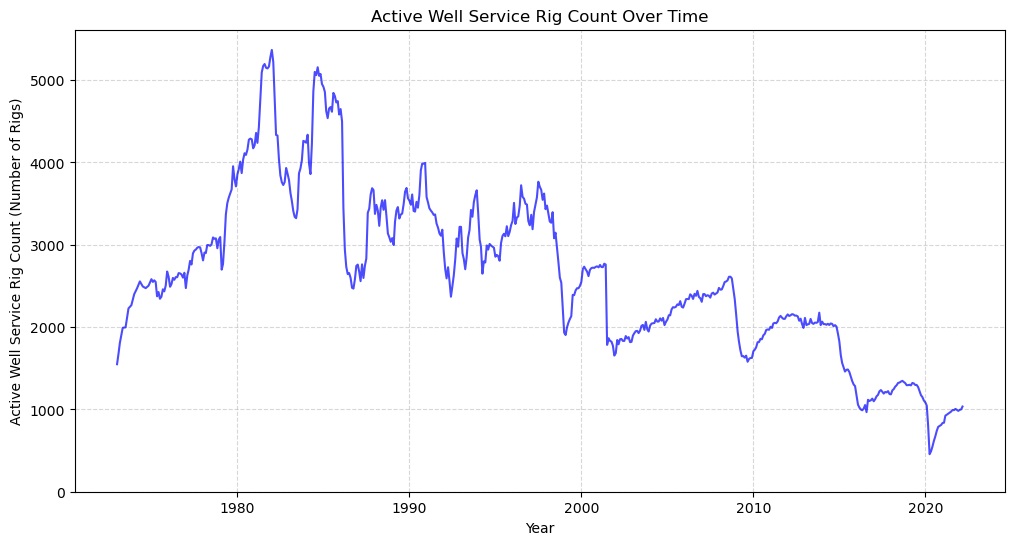

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'], linestyle='-', color='b', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Active Well Service Rig Count (Number of Rigs)")
plt.title("Active Well Service Rig Count Over Time")
plt.ylim(bottom=0) 
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

- Rapid Growth (1950s–1980s): The rig count increased steadily, reaching its peak in the early 1980s
- High Volatility (1980s–1990s): Large fluctuations are visible, possibly due to oil price shocks, economic downturns, or policy changes
- Gradual Decline (2000s–2020s): The overall trend since the late 1990s has been downward, with multiple sharp declines, especially around 2008 (Global Financial Crisis) and 2020 (COVID-19 pandemic)


4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.


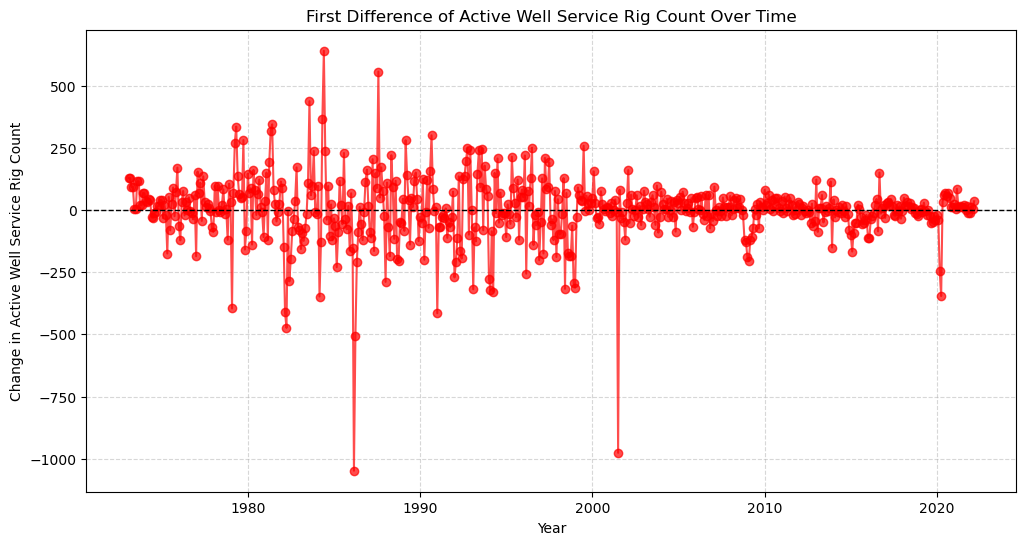

In [ ]:
df['Rig Change'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()


plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Rig Change'], marker='o', linestyle='-', color='r', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0
plt.xlabel("Year")
plt.ylabel("Change in Active Well Service Rig Count")
plt.title("First Difference of Active Well Service Rig Count Over Time")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


- High Volatility: The plot shows frequent large positive and negative spikes, indicating periods of rapid expansion and contraction in the industry
- Extreme Drops: There are significant downward spikes around the 1980s, late 1990s, and early 2000s, suggesting major industry disruptions, possibly due to oil price crashes or economic downturns
- Mean-Reverting Behavior: Most fluctuations seem to return to a central trend, implying that growth and decline periods balance out over time

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

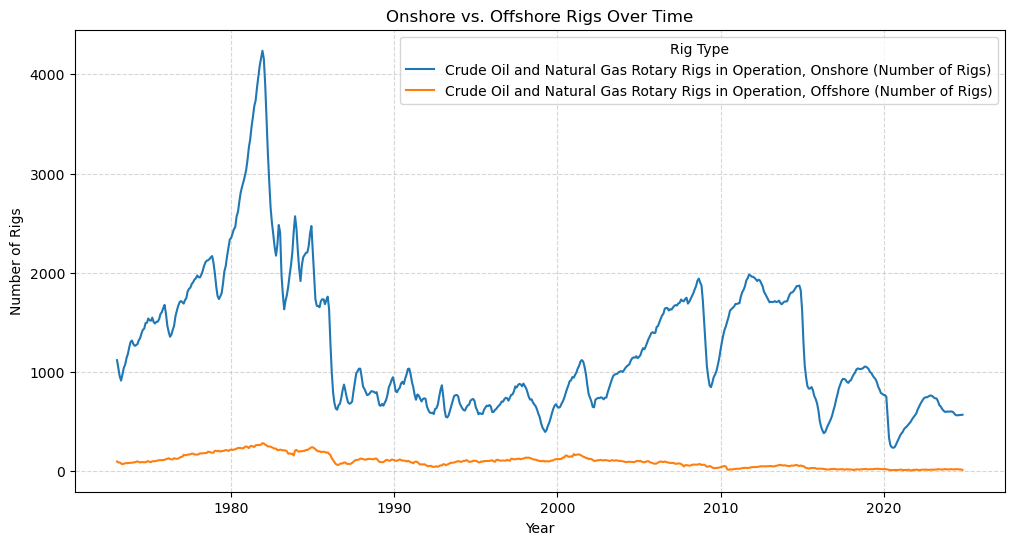

In [116]:
# Melt the Onshore and Offshore columns
df_melted = df.melt(id_vars=["time"], value_vars=["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)", 
                                                  "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"],
                    var_name="Rig Type", value_name="Number of Rigs")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="time", y="Number of Rigs", hue="Rig Type")
plt.xlabel("Year")
plt.ylabel("Number of Rigs")
plt.title("Onshore vs. Offshore Rigs Over Time")
plt.legend(title="Rig Type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
